In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file = pd.read_csv('events.csv',low_memory=False)

In [4]:
visited = file.loc[file.event=='visited site']

In [17]:
visited['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

In [5]:
compras = file.loc[file.event=='conversion']

In [6]:
p = visited.groupby('person')

In [23]:
def disp (x):
    return ', '.join(sorted(x.device_type.unique()))
origen = p.apply(disp)

In [24]:
origen.value_counts()

Smartphone                      13967
Computer                        11768
Computer, Smartphone              625
Tablet                            467
Unknown                            40
Smartphone, Tablet                 11
Computer, Tablet                   11
Computer, Smartphone, Tablet        6
Computer, Unknown                   3
Smartphone, Unknown                 1
dtype: int64

In [25]:
i = origen.reset_index()

In [26]:
i.head()

,person,0
0,0004b0a2,Smartphone
1,0006a21a,Smartphone
2,000a54b2,Computer
3,00184bf9,Computer
4,0019c395,Smartphone


In [27]:
i['compro'] = i['person'].isin(compras['person'])

In [28]:
i.head()

,person,0,compro
0,0004b0a2,Smartphone,False
1,0006a21a,Smartphone,False
2,000a54b2,Computer,False
3,00184bf9,Computer,False
4,0019c395,Smartphone,False


In [47]:
c = i.groupby(0).agg({'compro':'sum'}).sort_values('compro',ascending=False)

In [48]:
c

,compro
0,
Computer,263.0
"Computer, Smartphone",193.0
Smartphone,166.0
"Smartphone, Tablet",3.0
"Computer, Tablet",2.0
Tablet,2.0
"Computer, Smartphone, Tablet",1.0
"Computer, Unknown",1.0
"Smartphone, Unknown",0.0


Text(0.5,1,'Cantidad de personas que compraron segun dispositivos utilizados para ingresar')

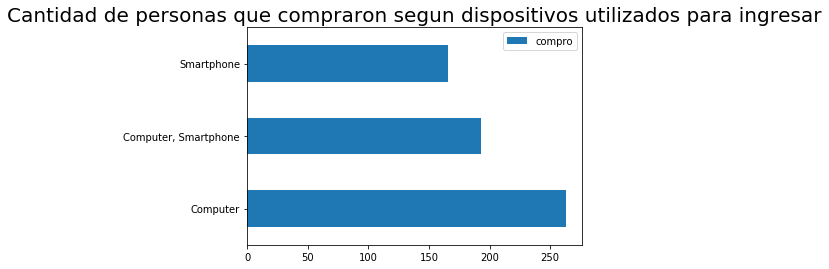

In [63]:
g = (c.head(3)).plot.barh()
g.set_ylabel('')
g.set_title('Cantidad de personas que compraron segun dispositivos utilizados para ingresar',size=20)